# Import des bibliothèques

In [2]:
import pandas as pd
import plotly.express as px
import sys
sys.path.append('..')
from scripts.FeaturesExtraction import get_extracted_features

# Récupération du dataset avec les features

In [2]:
df = get_extracted_features(10000)
df

table 1 / 4
table 2 / 4
table 3 / 4
table 4 / 4


,tconst,titletype,primarytitle,isadult,startyear,genres,averagerating,numvotes,seasonnumber,episodenumber,regionnumber,regionlist,actor,self,producer,actress,director
0,tt12826552,short,Grave of mammals and the interlopers,False,2026,"Documentary,Family,Mystery",NaN,NaN,NaN,NaN,2.0,"[IN, \N]",[],[],[Subhankan Acharjee],[],[Hyash Tanmoy]
1,tt13163296,movie,The Reunion,False,2026,Thriller,NaN,NaN,NaN,NaN,2.0,"[\N, US]","[Kyle Maurice, Gregory Kieth]",[],[Grace Wan],[Dawn Richard],[Grace Wan]
2,tt13294590,movie,Skyscraper on an Uninhabited Island,False,2026,"Adventure,Drama,Sci-Fi",NaN,NaN,NaN,NaN,2.0,"[\N, US]",[Doug Rand],[],[Leonid Khromov],"[Jenna Kerns, Nina Beni]",[Leonid Khromov]
3,tt13666744,videoGame,Prince of Persia: The Sands of Time,False,2026,"Action,Adventure,Fantasy",NaN,NaN,NaN,NaN,3.0,"[XWW, \N, US, XWW, US]",[Eilias Changuel],[],[],"[Supinder Wraich, Kristina Sandev]",[]
4,tt14478286,tvSeries,Untitled Liver Bird Films Project,False,2026,Drama,NaN,NaN,1.0,1.0,2.0,"[\N, GB]",[Jay Fisher],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,tt8579706,tvEpisode,The Final Deduction,False,2029,Drama,NaN,NaN,1.0,6.0,1.0,[\N],"[George Stackhouse, Matthew Leeson, Aaron Murr...",[],[],"[Eve Harding, Lauren Barratt, Katie Amanda Smi...",[Aisleen Hodges]
9996,tt8814476,movie,Supergirl: Woman of Tomorrow,False,2026,"Action,Adventure,Fantasy",NaN,NaN,NaN,NaN,5.0,"[\N, \N, GB, IN, CA, US, CA]","[Jason Momoa, Matthias Schoenaerts, David Krum...",[],"[Peter Safran, James Gunn]","[Milly Alcock, Milly Alcock, Eve Ridley, Emily...",[Craig Gillespie]
9997,tt9077514,movie,Untitled the Chronicles of Narnia Netflix Film,False,2026,"Adventure,Family,Fantasy",NaN,NaN,NaN,NaN,2.0,"[\N, US]",[],[],"[Mark Gordon, Douglas Gresham, Amy Pascal, Vin...",[],[Greta Gerwig]
9998,tt9173310,tvSeries,Men of Gray - The Flying Squad,False,2026,Action,NaN,NaN,NaN,NaN,2.0,"[\N, TT]",[G. Anthony Joseph],[],[],[],[]


In [4]:
df.to_csv("../data/all_data_for_10000_lines.csv", index=False)

# Reprendre ici

In [3]:
df = pd.read_csv('../data/all_data_for_10000_lines.csv')

# Analyse des notations

## agrégation numvotes et averagerating

On peux utiliser le score pondéré avec un minimum de votes (agrérgation utilisé par imdb pour le score). Cela permet de tenir compte du nombre du vote dans le score et que les films avec moins de votes soient moins pénalisés dans leur score.

In [4]:
# Paramètres pour le calcul du score pondéré
C = df['averagerating'].mean()  # Score moyen de tous les films
m = 1000  # Nombre minimum de votes requis pour être pris en compte

# Calcul du score pondéré
def weighted_rating(x, m=m, C=C):
    v = x['numvotes']
    R = x['averagerating']
    return (v / (v + m) * R) + (m / (v + m) * C)

df['weighted_score'] = df.apply(weighted_rating, axis=1)
df

tconst  titletype                                    primarytitle  \
0     tt12826552      short            Grave of mammals and the interlopers   
1     tt13163296      movie                                     The Reunion   
2     tt13294590      movie             Skyscraper on an Uninhabited Island   
3     tt13666744  videoGame             Prince of Persia: The Sands of Time   
4     tt14478286   tvSeries               Untitled Liver Bird Films Project   
...          ...        ...                                             ...   
9995   tt8579706  tvEpisode                             The Final Deduction   
9996   tt8814476      movie                    Supergirl: Woman of Tomorrow   
9997   tt9077514      movie  Untitled the Chronicles of Narnia Netflix Film   
9998   tt9173310   tvSeries                  Men of Gray - The Flying Squad   
9999   tt9765352      movie                                         Regresa   

      isadult  startyear                      genres  averagerating  numvotes  \
0       False       2026  Documentary,Family,Mystery            NaN       NaN   
1       False       2026                    Thriller            NaN       NaN   
2       False       2026      Adventure,Drama,Sci-Fi            NaN       NaN   
3       False       2026    Action,Adventure,Fantasy            NaN       NaN   
4       False       2026                       Drama            NaN       NaN   
...       ...        ...                         ...            ...       ...   
9995    False       2029                       Drama            NaN       NaN   
9996    False       2026    Action,Adventure,Fantasy            NaN       NaN   
9997    False       2026    Adventure,Family,Fantasy            NaN       NaN   
9998    False       2026                      Action            NaN       NaN   
9999    False       2026       Drama,Horror,Thriller            NaN       NaN   

      seasonnumber  episodenumber  regionnumber  \
0              NaN            NaN           2.0   
1              NaN            NaN           2.0   
2              NaN            NaN           2.0   
3              NaN            NaN           3.0   
4              1.0            1.0           2.0   
...            ...            ...           ...   
9995           1.0            6.0           1.0   
9996           NaN            NaN           5.0   
9997           NaN            NaN           2.0   
9998           NaN            NaN           2.0   
9999           NaN            NaN           2.0   

                                        regionlist  \
0                                    ['IN', '\\N']   
1                                    ['\\N', 'US']   
2                                    ['\\N', 'US']   
3                ['XWW', '\\N', 'US', 'XWW', 'US']   
4                                    ['\\N', 'GB']   
...                                            ...   
9995                                       ['\\N']   
9996  ['\\N', '\\N', 'GB', 'IN', 'CA', 'US', 'CA']   
9997                                 ['\\N', 'US']   
9998                                 ['\\N', 'TT']   
9999                                 ['\\N', 'US']   

                                                  actor self  \
0                                                    []   []   
1                     ['Kyle Maurice', 'Gregory Kieth']   []   
2                                         ['Doug Rand']   []   
3                                   ['Eilias Changuel']   []   
4                                        ['Jay Fisher']   []   
...                                                 ...  ...   
9995  ['George Stackhouse', 'Matthew Leeson', 'Aaron...   []   
9996  ['Jason Momoa', 'Matthias Schoenaerts', 'David...   []   
9997                                                 []   []   
9998                              ['G. Anthony Joseph']   []   
9999                                                 []   []   

                                               producer  

In [5]:
df["weighted_score"].describe()

count    1027.000000
mean        6.926801
std         0.326370
min         4.405601
25%         6.943240
50%         6.959651
75%         6.974027
max         8.683838
Name: weighted_score, dtype: float64

## Représentation de la notation


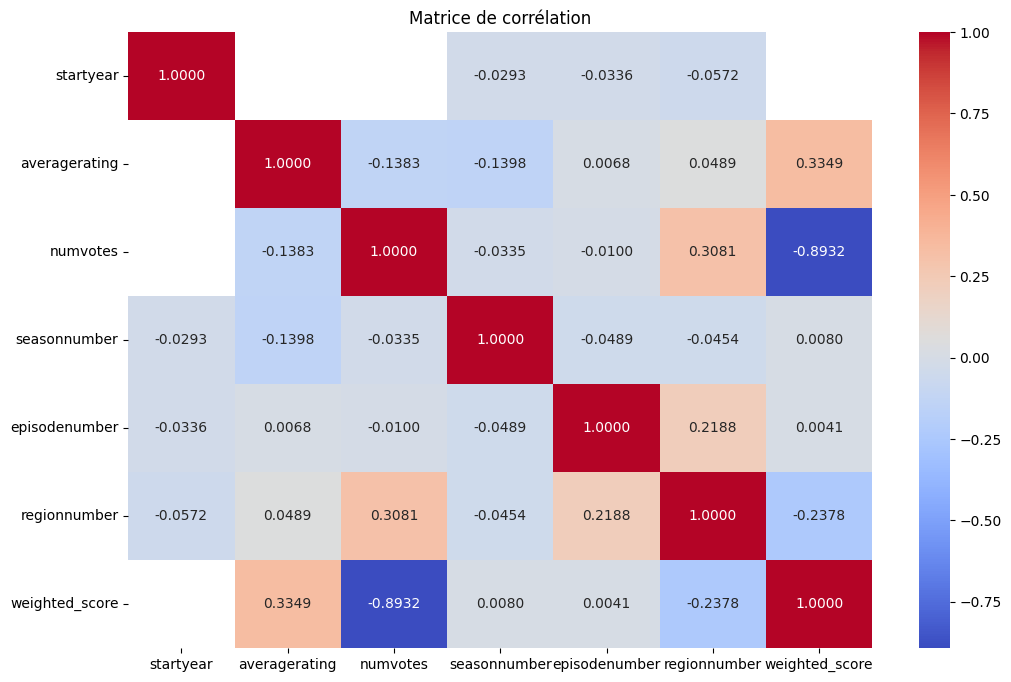

In [11]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calcul de la matrice de corrélation
# Enlever les colonnes non numériques
numeric_df = df.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr()

df["episodenumber"] = df["episodenumber"].fillna(1)
df["seasonnumber"] = df["seasonnumber"].fillna(1)

# Affichage de la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.4f')
plt.title('Matrice de corrélation')
plt.show()

In [6]:
px.histogram(df, x='weighted_score', title='Nombre de votes en fonction du score pondéré', nbins=500)

## titletype et notation

In [7]:

px.violin(df, x='titletype', y='weighted_score', 
                labels={'titletype': 'Title Type', 'weighted_score': 'Weighted Score'},
                title='Distribution of Weighted Scores by Title Type', box=True, points="all")

## isadult et notation

In [8]:
px.violin(df, x='isadult', y='weighted_score', 
                title='Distribution of Weighted Scores by adult or not', box=True, points="all")

## startyear et notation

In [10]:
mean_weighted_score_by_year = df.groupby('startyear')['weighted_score'].mean().reset_index()
px.line(mean_weighted_score_by_year, x='startyear', y='weighted_score', 
              labels={'startyear': 'Start Year', 'weighted_score': 'Average Weighted Score'},
              title='Average Weighted Score by Start Year')

## endyear et notation

In [12]:
mean_weighted_score_by_year = df.groupby('endyear')['weighted_score'].mean().reset_index()
px.line(mean_weighted_score_by_year, x='endyear', y='weighted_score', 
              labels={'endyear': 'Endyear Year', 'weighted_score': 'Average Weighted Score'},
              title='Average Weighted Score by End Year')

## runtimeminutes et notation

In [16]:
mean_weighted_score_by_runtimeminutes = df.groupby('runtimeminutes')['weighted_score'].mean().reset_index()
px.line(mean_weighted_score_by_runtimeminutes, x='runtimeminutes', y='weighted_score', 
              labels={'runtimeminutes': 'Duration', 'weighted_score': 'Average Weighted Score'},
              title='Average Weighted Score by Duration')

## genres et notation

In [20]:
df_exploded = df.assign(genres=df['genres'].str.split(',')).explode('genres')
px.violin(df_exploded, x='genres', y='weighted_score', 
                labels={'genres': 'Genre', 'weighted_score': 'Weighted Score'},
                title='Distribution of Weighted Scores by Genre', box=True, points="all")

# episodenumber et notation

In [26]:
mean_weighted_score_by_episodenumber = df.groupby('episodenumber')['weighted_score'].mean().reset_index()
px.line(mean_weighted_score_by_episodenumber, x='episodenumber', y='weighted_score', 
              labels={'episodenumber': 'Episode number', 'weighted_score': 'Average Weighted Score'},
              title='Average Weighted Score by Episode number',
              range_x=[0, 200])

# seasonnumber et notation

In [28]:
mean_weighted_score_by_seasonnumber = df.groupby('seasonnumber')['weighted_score'].mean().reset_index()
px.line(mean_weighted_score_by_seasonnumber, x='seasonnumber', y='weighted_score', 
              labels={'seasonnumber': 'Season number', 'weighted_score': 'Average Weighted Score'},
              title='Average Weighted Score by Season number',
              range_x=[0, 50])

### regionnumber et notation

In [29]:
mean_weighted_score_by_regionnumber = df.groupby('regionnumber')['weighted_score'].mean().reset_index()
px.line(mean_weighted_score_by_regionnumber, x='regionnumber', y='weighted_score', 
              labels={'regionnumber': 'Region number', 'weighted_score': 'Average Weighted Score'},
              title='Average Weighted Score by Region number')

# regionlist et notation

In [38]:
def clean_regionlist(region_list_str):
    region_list_str = region_list_str.strip("[]").replace("'", "")
    region_list = region_list_str.split(", ")
    return [region for region in region_list if region != '\\N']

df['regionlist'] = df['regionlist'].apply(clean_regionlist)



AttributeError: 'list' object has no attribute 'strip'

In [39]:
df_exploded = df.explode('regionlist')
mean_weighted_score_by_region = df_exploded.groupby('regionlist')['weighted_score'].mean().reset_index()
px.violin(df_exploded, x='regionlist', y='weighted_score', 
                labels={'regionlist': 'Region', 'weighted_score': 'Weighted Score'},
                title='Distribution of Weighted Scores by Region', box=True)